In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist

import dionysus as d

from biomarker.data_collection import *

data_collection


In [2]:
EXCLUDE_KEYS = [206, 205, 184, 183, 82, 81, 45]
excel = parse_master_file(exclude_keys=EXCLUDE_KEYS).reset_index().drop(['index'], axis=1)
L = get_filename_list(excel['Associated data'])

[3, 9]


In [3]:
excel.tail()

,Input,Key,Associated data,X10: Category Method,X11: Temperature (K),X12: [Salt*Valency],X13: Category Salt type,X14: [Buffer] (mM),X15: pH,X16: CI #,X17: CI,Unnamed: 11,Output: logK,Output: logKbucket
191,199,216,SB_901,C,298.15,NaN,NaN,NaN,7.0,NaN,NaN,NaN,6.54,1
192,200,217,SB_902,C,298.15,NaN,NaN,NaN,7.0,NaN,NaN,NaN,1.99,0
193,201,218,SB_903,C,298.15,NaN,NaN,NaN,7.0,NaN,NaN,NaN,1.99,0
194,202,219,SB_904,C,298.15,NaN,NaN,NaN,7.0,NaN,NaN,NaN,1.99,0
195,203,220,SB_905,C,298.15,NaN,NaN,NaN,7.0,NaN,NaN,NaN,1.99,0


In [4]:
x1s = []
for l in L:
    x1s.append(parse_x1(l))

In [27]:
POI = -1
x1s[POI]

,Center Number,Atomic Number,X,Y,Z
0,1,6,1.165538,0.709238,0.000106
1,2,6,1.165752,-0.709281,-0.000066
2,3,6,0.000058,-1.467239,-0.000167
3,4,6,-1.165542,-0.709241,-0.000117
4,5,6,-1.165759,0.709282,0.000063
5,6,6,-0.000060,1.467237,0.000160
6,7,7,-2.504707,-1.102408,-0.000267
7,8,6,-3.257245,-0.000301,-0.000097
8,9,7,-2.504800,1.102235,0.000082
9,10,7,2.504704,1.102406,0.000244


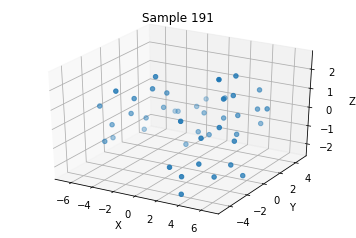

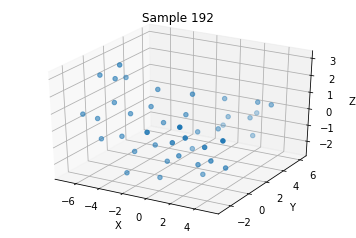

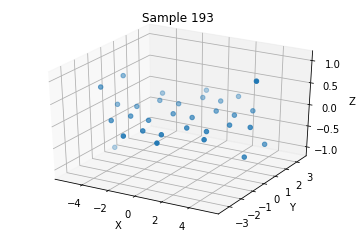

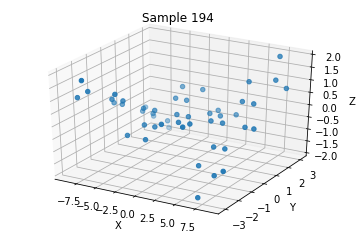

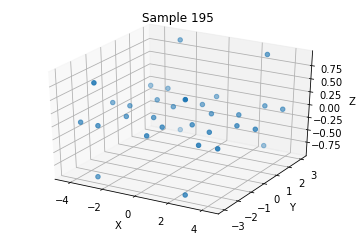

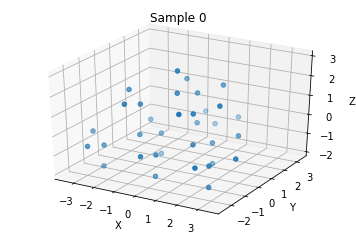

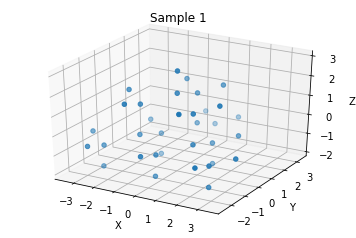

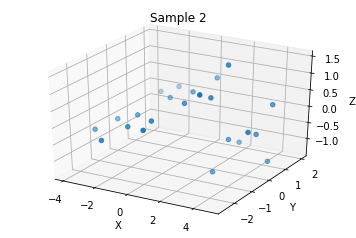

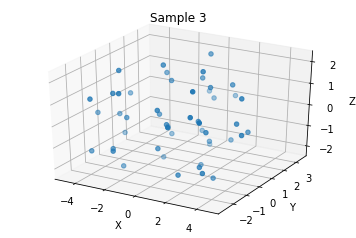

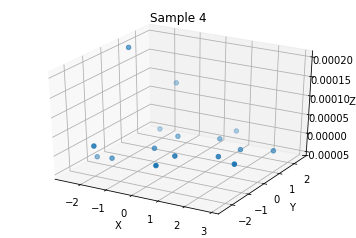

In [45]:
for i in range(len(x1s)-5,len(x1s)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1s[i].X, x1s[i].Y, x1s[i].Z)
    ax.set_title('Sample {}'.format(i))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
for i in range(5):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1s[i].X, x1s[i].Y, x1s[i].Z)
    ax.set_title('Sample {}'.format(i))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

In [42]:
points = x1s[POI][['X', 'Y', 'Z']].values
dists = pdist(points, 'euclidean')
r = np.max(dists)
# r = 4
print(r)

9.559985592281297


In [43]:
k = 3
print(k, r)
f = d.fill_rips(points, k, r)
print(f)

3 9.559985592281297
Filtration with 41448 simplices


[Diagram with 44 points, Diagram with 7 points, Diagram with 2 points, Diagram with 123410 points]


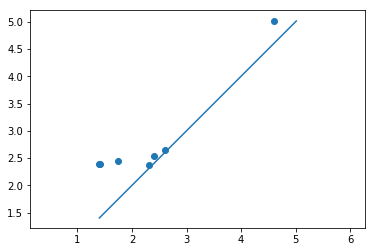

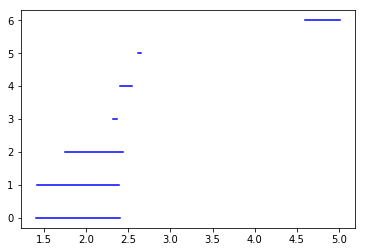

[Diagram with 42 points, Diagram with 7 points, Diagram with 2 points, Diagram with 101270 points]


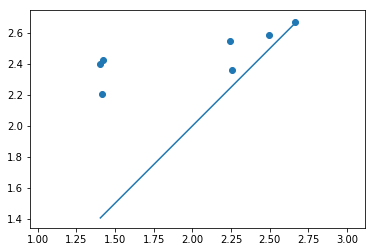

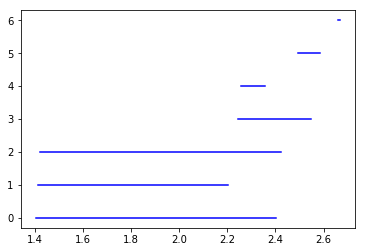

[Diagram with 32 points, Diagram with 4 points, Diagram with 4 points, Diagram with 31465 points]


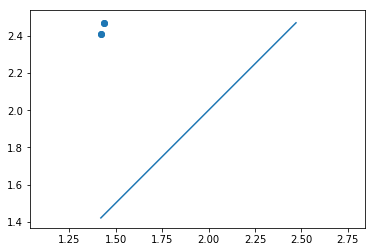

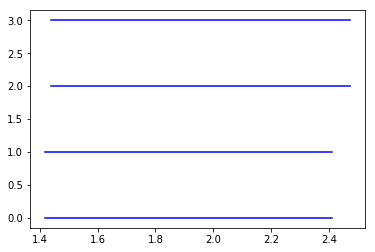

[Diagram with 50 points, Diagram with 14 points, Diagram with 6 points, Diagram with 211876 points]


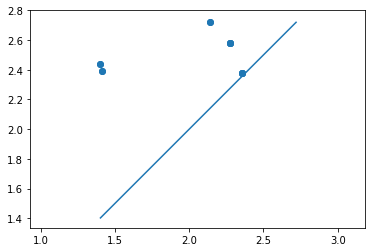

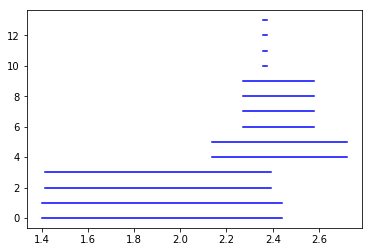

[Diagram with 32 points, Diagram with 7 points, Diagram with 1 points, Diagram with 31465 points]


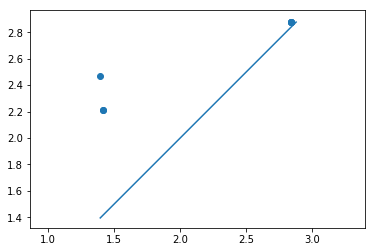

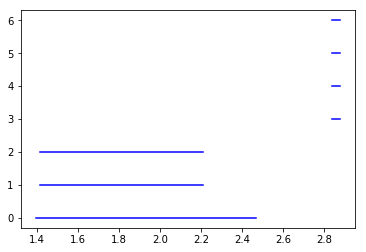

In [46]:
k = 3
for i in range(len(x1s)-5,len(x1s)):
    points = x1s[i][['X', 'Y', 'Z']].values
    r = np.max(pdist(points, 'euclidean'))
    f = d.fill_rips(points, k, r)
    m = d.homology_persistence(f)
    dgms = d.init_diagrams(m, f)
    print(dgms)
    d.plot.plot_diagram(dgms[1], show = True)
    d.plot.plot_bars(dgms[1], show = True)

In [12]:
r = 6
k = 2
results = []
for i in range(len(x1s)):
    print('step: {}'. format(i))
    pointsi = x1s[i][['X', 'Y', 'Z']].values
    fi = d.fill_rips(pointsi, k, r)
    mi = d.homology_persistence(fi)
    dgms = d.init_diagrams(mi, fi)
    

    results.append({'diagram': dgms, 'sample':i})
            

step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19
step: 20
step: 21
step: 22
step: 23
step: 24
step: 25
step: 26
step: 27
step: 28
step: 29
step: 30
step: 31
step: 32
step: 33
step: 34
step: 35
step: 36
step: 37
step: 38
step: 39
step: 40
step: 41
step: 42
step: 43
step: 44
step: 45
step: 46
step: 47
step: 48
step: 49
step: 50
step: 51
step: 52
step: 53
step: 54
step: 55
step: 56
step: 57
step: 58
step: 59
step: 60
step: 61
step: 62
step: 63
step: 64
step: 65
step: 66
step: 67
step: 68
step: 69
step: 70
step: 71
step: 72
step: 73
step: 74
step: 75
step: 76
step: 77
step: 78
step: 79
step: 80
step: 81
step: 82
step: 83
step: 84
step: 85
step: 86
step: 87
step: 88
step: 89
step: 90
step: 91
step: 92
step: 93
step: 94
step: 95
step: 96
step: 97
step: 98
step: 99
step: 100
step: 101
step: 102
step: 103
step: 104
step: 105
step: 106
step: 107
step: 108
step: 109
step: 110


In [13]:
resdf = pd.DataFrame(results)
print(resdf.shape)
resdf.head()

(196, 2)


,diagram,sample
0,"[((0,inf), (0,1.53959), (0,1.54548), (0,1.5456...",0
1,"[((0,inf), (0,1.53959), (0,1.54548), (0,1.5456...",1
2,"[((0,inf), (0,1.39446), (0,1.40041), (0,1.3886...",2
3,"[((0,inf), (0,1.53408), (0,1.53408), (0,1.5439...",3
4,"[((0,inf), (0,1.3986), (0,1.39259), (0,1.39167...",4


In [60]:
diags = []
for i in range(resdf.shape[0]):
    diag = []
    d = resdf.iloc[i]['diagram']
    for pt in d[1]:
#         if pt.death < 1000000:
        diag.append([pt.birth, pt.death])
    diags.append(np.array(diag))
# diags = [[pt.birth, pt.death] for pt in d[1] for d in resdf['diagram'] if pt.death < float('inf')]

In [61]:
LS = tda.Landscape(resolution = 1000)
L = LS.fit_transform(diags)

ValueError: all the input arrays must have same number of dimensions

In [57]:
import sklearn_tda as tda

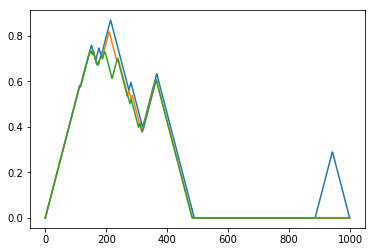

In [35]:
plt.plot(L[0][:1000])
plt.plot(L[0][1000:2000])
plt.plot(L[0][2000:3000])

array([[0.        , 0.00514392, 0.01028784, ..., 0.        , 0.        ,
        0.        ]])